<a href="https://colab.research.google.com/github/UzunDemir/CS224N/blob/main/Gensim_word_vector_visualization_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gensim word vector visualization of various word vectors

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 58.0 MB/s eta 0:00:00


In [3]:
import numpy as np

# Get the interactive Tools for Matplotlib
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

import gensim.downloader as api
from gensim.models import KeyedVectors

For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

I'll use our homegrown Stanford offering of GloVe word vectors. Gensim provides a library of several sets of word vectors that you can easily load. You can find out more about GloVe on [the Glove page](https://nlp.stanford.edu/projects/glove/). I use the 100d vectors below as a balance between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, you'll wait longer, but they're even better than the 100d vectors.

In [4]:
model = api.load("glove-wiki-gigaword-100")
print(type(model))

[==================================================] 100.0% 128.1/128.1MB downloaded
<class 'gensim.models.keyedvectors.KeyedVectors'>


In [5]:
model['bread']

array([-0.66146  ,  0.94335  , -0.72214  ,  0.17403  , -0.42524  ,
        0.36303  ,  1.0135   , -0.14802  ,  0.25817  , -0.20326  ,
       -0.64338  ,  0.16632  ,  0.61518  ,  1.397    , -0.094506 ,
        0.0041843, -0.18976  , -0.55421  , -0.39371  , -0.22501  ,
       -0.34643  ,  0.32076  ,  0.34395  , -0.7034   ,  0.23932  ,
        0.69951  , -0.16461  , -0.31819  , -0.34034  , -0.44906  ,
       -0.069667 ,  0.35348  ,  0.17498  , -0.95057  , -0.2209   ,
        1.0647   ,  0.23231  ,  0.32569  ,  0.47662  , -1.1206   ,
        0.28168  , -0.75172  , -0.54654  , -0.66337  ,  0.34804  ,
       -0.69058  , -0.77092  , -0.40167  , -0.069351 , -0.049238 ,
       -0.39351  ,  0.16735  , -0.14512  ,  1.0083   , -1.0608   ,
       -0.87314  , -0.29339  ,  0.68278  ,  0.61634  , -0.088844 ,
        0.88094  ,  0.099809 , -0.27161  , -0.58026  ,  0.50364  ,
       -0.93814  ,  0.67576  , -0.43124  , -0.10517  , -1.2404   ,
       -0.74353  ,  0.28637  ,  0.29012  ,  0.89377  ,  0.6740

In [6]:
model['croissant']

array([-0.25144  ,  0.52157  , -0.75452  ,  0.28039  , -0.31388  ,
        0.274    ,  1.1971   , -0.10519  ,  0.82544  , -0.33398  ,
       -0.21417  ,  0.22216  ,  0.14982  ,  0.47384  ,  0.41984  ,
        0.69397  , -0.25999  , -0.44414  ,  0.58296  , -0.30851  ,
       -0.076455 ,  0.33468  ,  0.28055  , -0.99012  ,  0.30349  ,
        0.39128  ,  0.031526 , -0.095395 , -0.004745 , -0.81347  ,
        0.27869  , -0.1812   ,  0.14632  , -0.42186  ,  0.13857  ,
        1.139    ,  0.14925  , -0.051459 ,  0.37875  , -0.2613   ,
        0.011081 , -0.28881  , -0.38662  , -0.3135   , -0.1954   ,
        0.19248  , -0.52995  , -0.40674  , -0.25159  ,  0.06272  ,
       -0.32724  ,  0.28374  , -0.2155   , -0.061832 , -0.50134  ,
        0.0093959,  0.30715  ,  0.3873   , -0.74554  , -0.45947  ,
        0.40032  , -0.1378   , -0.26968  , -0.3946   , -0.64876  ,
       -0.47149  , -0.085536 ,  0.092795 , -0.034018 , -0.61906  ,
        0.19123  ,  0.20563  ,  0.29056  , -0.010908 ,  0.1531

In [7]:
model.most_similar('usa')

[('canada', 0.6544384956359863),
 ('america', 0.645224392414093),
 ('u.s.a.', 0.6184033751487732),
 ('united', 0.6017189621925354),
 ('states', 0.5970699191093445),
 ('australia', 0.5838716626167297),
 ('world', 0.5590084195137024),
 ('2010', 0.5580702424049377),
 ('2012', 0.5504006743431091),
 ('davis', 0.5464468002319336)]

In [8]:
model.most_similar('banana')

[('coconut', 0.7097253203392029),
 ('mango', 0.7054824829101562),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420575976371765),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.6294420957565308),
 ('papaya', 0.6246591210365295)]

In [9]:
model.most_similar('croissant')

[('croissants', 0.682984471321106),
 ('brioche', 0.6283302307128906),
 ('baguette', 0.5968103408813477),
 ('focaccia', 0.5876684188842773),
 ('pudding', 0.5803956389427185),
 ('souffle', 0.5614768862724304),
 ('baguettes', 0.5558240413665771),
 ('tortilla', 0.5449503064155579),
 ('pastries', 0.5427731275558472),
 ('calzone', 0.5374532341957092)]

In [10]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845588684082),
 ('damaskinos', 0.4617849290370941),
 ('yadin', 0.4617374837398529),
 ('hundertwasser', 0.4588957726955414),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.4566109776496887),
 ('rothfeld', 0.4523947238922119)]

In [12]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("Полные результаты:")
for word, score in result:
    print(f"  {word}: {score:.4f}")

Полные результаты:
  queen: 0.7699
  monarch: 0.6843
  throne: 0.6756
  daughter: 0.6595
  princess: 0.6521
  prince: 0.6517
  elizabeth: 0.6465
  mother: 0.6312
  emperor: 0.6106
  wife: 0.6099


In [11]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


In [13]:
# x1 : x2 :: y1 :: returned
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

![Analogy](imgs/word2vec-king-queen-composition.png)

In [14]:
analogy('man', 'king', 'woman')

'queen'

In [15]:
analogy('australia', 'beer', 'france')

'champagne'

In [16]:
analogy('pencil', 'sketching', 'camera')

'photographing'

In [17]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [18]:
analogy('tall', 'tallest', 'long')

'longest'

In [27]:
analogy('gagauz', 'moldova', 'noi')

'minsk'

In [28]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [29]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]

    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.annotate(word, (x, y), xytext=(x+0.05, y+0.05))

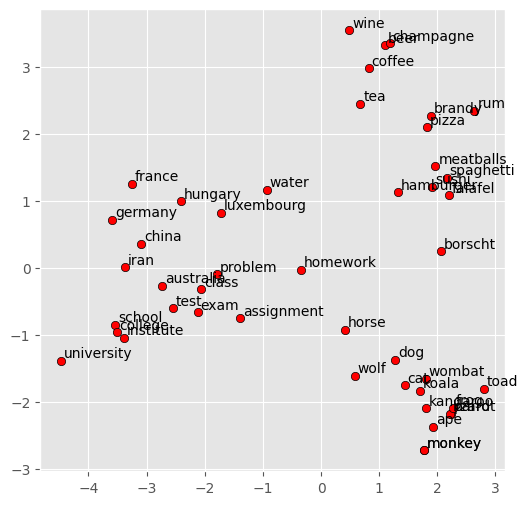

In [30]:
display_pca_scatterplot(model,
    ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
        'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
        'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
        'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
        'france', 'germany', 'hungary', 'luxembourg', 'australia', 'china', 'iran',
        'homework', 'assignment', 'problem', 'exam', 'test', 'class',
        'school', 'college', 'university', 'institute'])

🎨 Визуализация word vectors с помощью PCA
1. Семейные отношения:


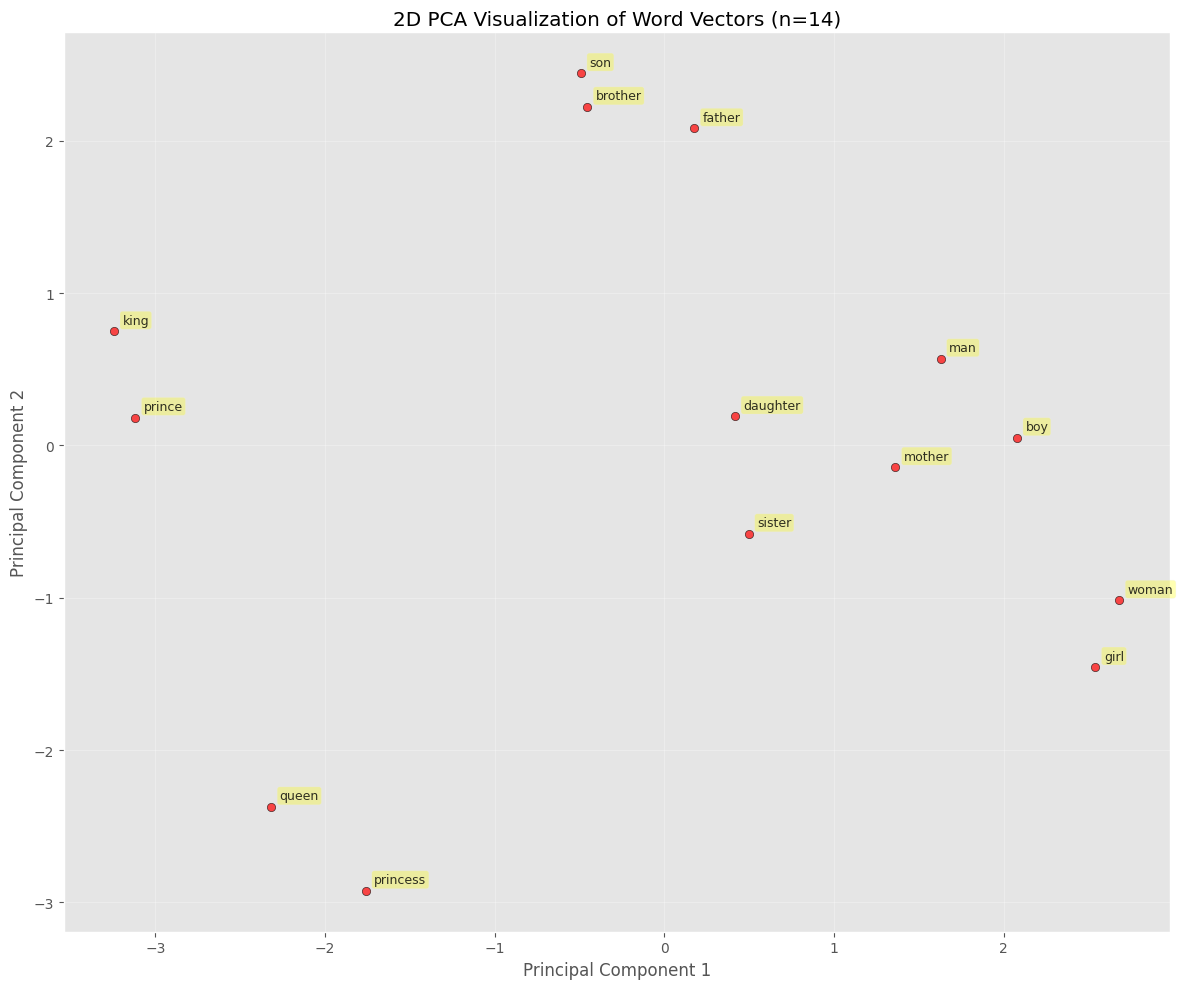

2. Страны и столицы:


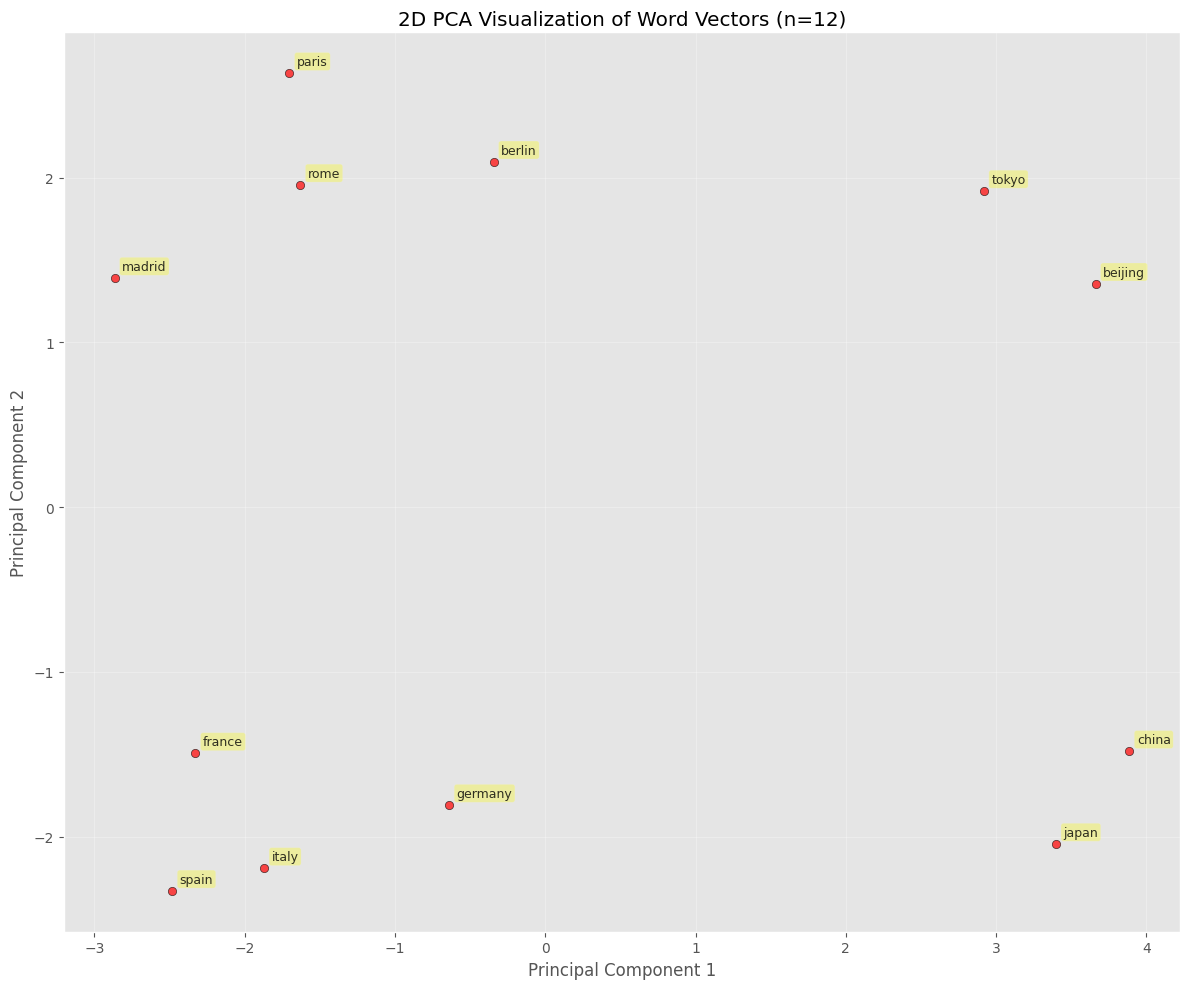

3. 20 случайных слов:


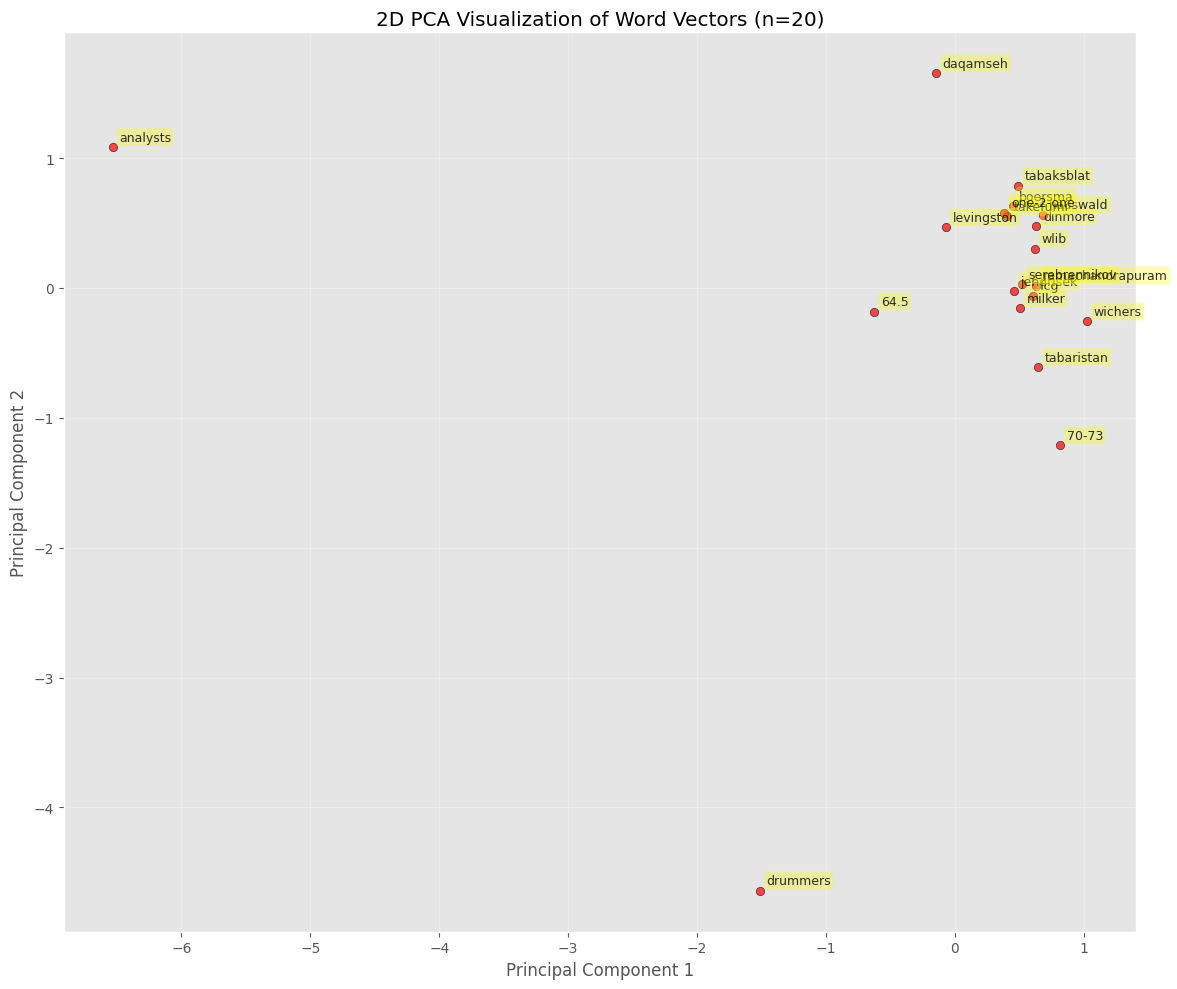

4. Эмоции:


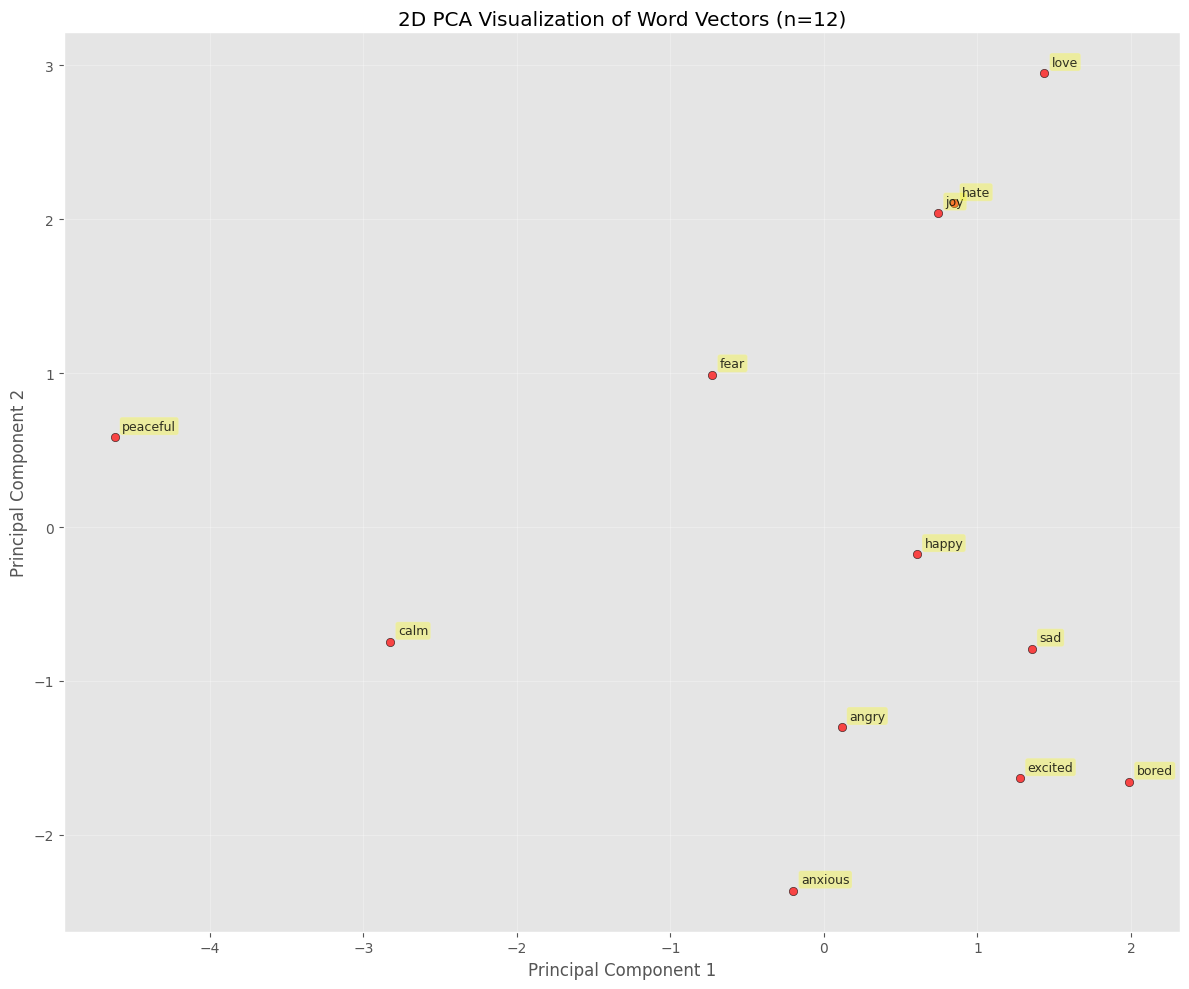

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None, sample=0):
    """
    Визуализирует слова в 2D пространстве с помощью PCA

    Args:
        model: Word2Vec или KeyedVectors модель
        words: список слов для визуализации (если None, берет случайные)
        sample: количество случайных слов (если words=None и sample>0)
    """
    if words is None:
        if sample > 0:
            # Берем случайные слова из словаря
            words = np.random.choice(list(model.key_to_index.keys()), sample)
        else:
            # Берем все слова (осторожно - может быть очень много!)
            words = list(model.key_to_index.keys())

    # Получаем векторы слов
    word_vectors = np.array([model[w] for w in words])

    # Уменьшаем размерность до 2D с помощью PCA
    twodim = PCA(n_components=2).fit_transform(word_vectors)

    # Создаем график
    plt.figure(figsize=(12, 10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r', alpha=0.7)

    # Добавляем подписи слов
    for word, (x, y) in zip(words, twodim):
        plt.annotate(word, (x, y), xytext=(x+0.05, y+0.05),
                    fontsize=9, alpha=0.8,
                    bbox=dict(boxstyle="round,pad=0.2", facecolor="yellow", alpha=0.3))

    plt.title(f"2D PCA Visualization of Word Vectors (n={len(words)})")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# =============================
# Примеры использования
# =============================

print("🎨 Визуализация word vectors с помощью PCA")
print("=" * 50)

# Пример 1: Семейные отношения
family_words = ['man', 'woman', 'boy', 'girl', 'father', 'mother',
                'son', 'daughter', 'brother', 'sister', 'king', 'queen',
                'prince', 'princess']

print("1. Семейные отношения:")
display_pca_scatterplot(model, words=family_words)

# Пример 2: Страны и столицы
country_words = ['france', 'germany', 'italy', 'spain', 'japan', 'china',
                 'paris', 'berlin', 'rome', 'madrid', 'tokyo', 'beijing']

print("2. Страны и столицы:")
display_pca_scatterplot(model, words=country_words)

# Пример 3: Случайные слова
print("3. 20 случайных слов:")
display_pca_scatterplot(model, sample=20)

# Пример 4: Эмоции и чувства
emotion_words = ['happy', 'sad', 'angry', 'joy', 'fear', 'love', 'hate',
                 'excited', 'bored', 'calm', 'anxious', 'peaceful']

print("4. Эмоции:")
display_pca_scatterplot(model, words=emotion_words)

🔍 Поиск гагаузских слов в модели
✅ 'gagauz' найден в модели
✅ 'gagauzia' найден в модели
✅ 'comrat' найден в модели
✅ 'bessarabia' найден в модели
✅ 'chisinau' найден в модели
✅ 'moldova' найден в модели
✅ 'turkish' найден в модели
✅ 'turkic' найден в модели
✅ 'orthodox' найден в модели
✅ 'christian' найден в модели
✅ 'balkan' найден в модели
❌ 'black sea' отсутствует в модели
✅ 'language' найден в модели
✅ 'culture' найден в модели
✅ 'people' найден в модели
✅ 'ethnic' найден в модели
✅ 'minority' найден в модели

📊 Найдено 16 гагаузских слов из 17

🎨 Визуализация гагаузских слов:


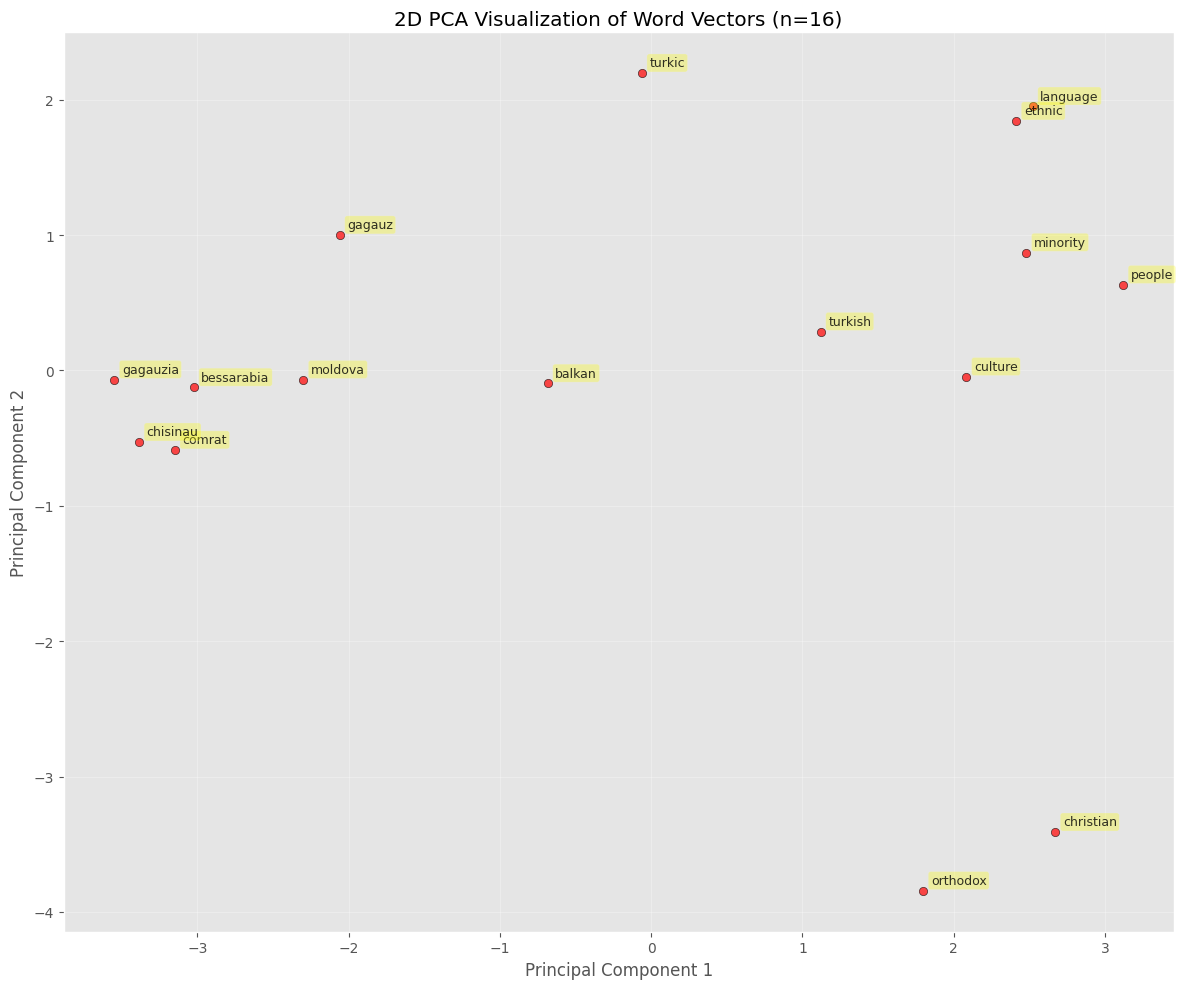

🔎 Семантически близкие слова к 'gagauz':
 1. lisu                 0.6457
 2. uigur                0.6402
 3. maonan               0.6245
 4. xibe                 0.6201
 5. evenk                0.6092
 6. dioula               0.5989
 7. mulam                0.5987
 8. nivkh                0.5894
 9. evenki               0.5827
10. djerma               0.5816
🌍 Поиск слов, связанных с гагаузской тематикой:
turkey:turkish :: moldova:moldovan (сходство: 0.8091)
russia:russian :: moldova:moldovan (сходство: 0.8462)
german:germany :: gagauz:kavadarci (сходство: 0.5799)
🔄 Создание расширенного списка для визуализации:
✅ География: moldova, romania, ukraine, bulgaria, turkey, balkans
✅ Народы: turkish, bulgarian, romanian, russian, ukrainian, tatar
✅ Культура: orthodox, christian, muslim, culture, tradition, language
✅ Города: chisinau, bucarest, ankara, sofia, odessa, istanbul

📋 Итоговый список для визуализации (33 слов):
['istanbul', 'ankara', 'culture', 'bucarest', 'ukrainian', 'gagauzia'

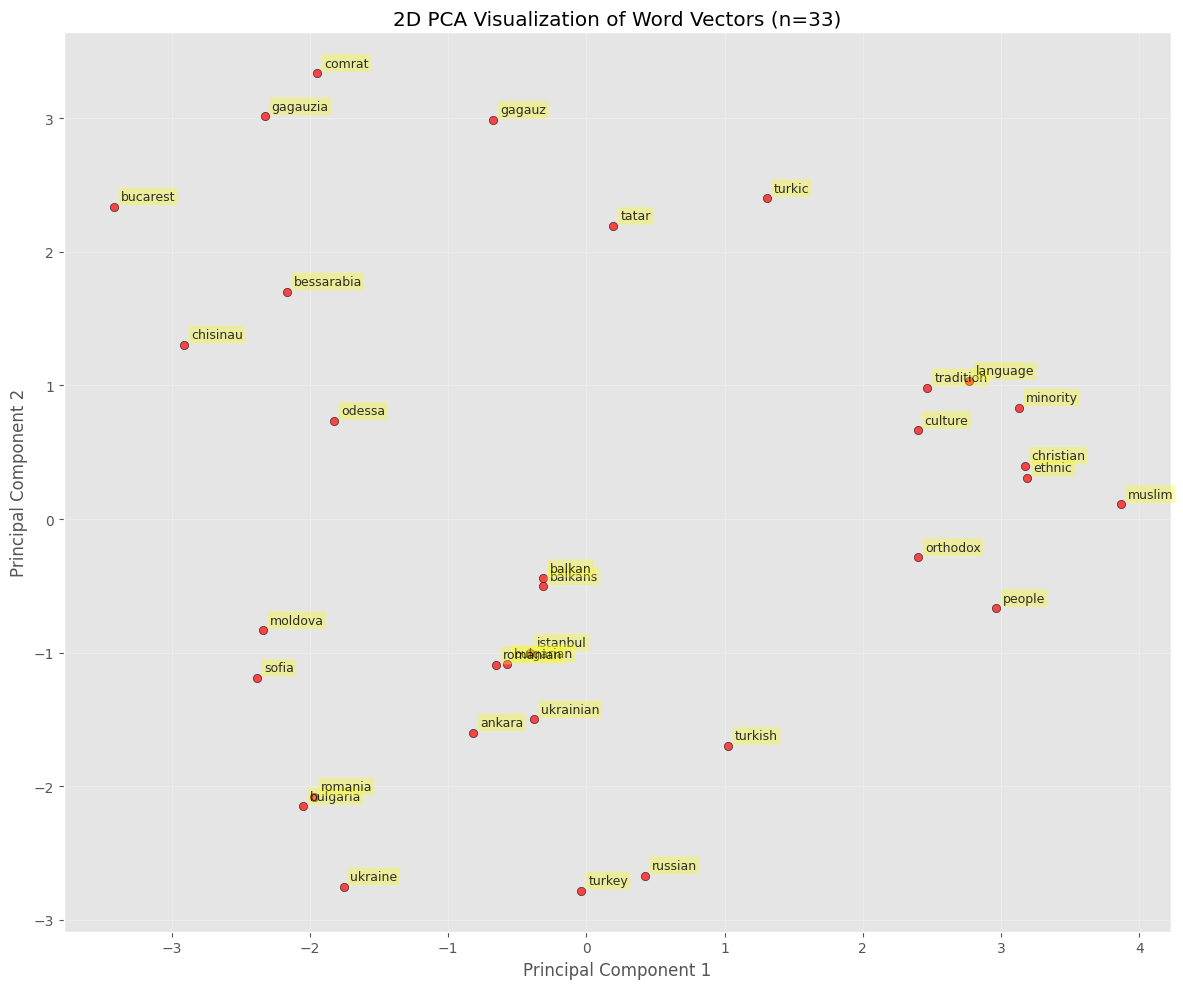

📊 Анализ семантических кластеров:
Сходство 'gagauz' и 'turkish': 0.2164
Сходство 'moldova' и 'romania': 0.7794
Сходство 'orthodox' и 'christian': 0.7193
Сходство 'balkans' и 'turkey': 0.4929


In [37]:
# =============================
# Анализ гагаузских слов в модели
# =============================

print("🔍 Поиск гагаузских слов в модели")
print("=" * 50)

# Список гагаузских слов для проверки
gagauz_words_to_check = [
    'gagauz', 'gagauzia', 'comrat', 'bessarabia', 'chisinau', 'moldova',
    'turkish', 'turkic', 'orthodox', 'christian', 'balkan', 'black sea',
    'language', 'culture', 'people', 'ethnic', 'minority'
]

# Проверим, какие слова есть в модели
available_gagauz_words = []
for word in gagauz_words_to_check:
    if word in model.key_to_index:
        available_gagauz_words.append(word)
        print(f"✅ '{word}' найден в модели")
    else:
        print(f"❌ '{word}' отсутствует в модели")

print(f"\n📊 Найдено {len(available_gagauz_words)} гагаузских слов из {len(gagauz_words_to_check)}")

# =============================
# Визуализация гагаузских слов
# =============================

if available_gagauz_words:
    print(f"\n🎨 Визуализация гагаузских слов:")
    display_pca_scatterplot(model, words=available_gagauz_words)
else:
    print("❌ Не найдено гагаузских слов для визуализации")

# =============================
# Поиск семантически близких слов
# =============================

print("=" * 50)
print("🔎 Семантически близкие слова к 'gagauz':")
print("=" * 50)

if 'gagauz' in model.key_to_index:
    similar_words = model.most_similar('gagauz', topn=10)
    for i, (word, similarity) in enumerate(similar_words, 1):
        print(f"{i:2}. {word:<20} {similarity:.4f}")
else:
    print("Слово 'gagauz' не найдено в модели")

# =============================
# Расширенный поиск связанных слов
# =============================

print("=" * 50)
print("🌍 Поиск слов, связанных с гагаузской тематикой:")
print("=" * 50)

# Попробуем найти слова через аналогии
related_queries = [
    ("turkey", "turkish", "moldova"),  # turkey:turkish :: moldova:?
    ("russia", "russian", "moldova"),  # russia:russian :: moldova:?
    ("german", "germany", "gagauz"),   # german:germany :: gagauz:?
]

for pos1, pos2, neg in related_queries:
    if all(word in model.key_to_index for word in [pos1, pos2, neg]):
        try:
            result = model.most_similar(positive=[pos2, neg], negative=[pos1])
            print(f"{pos1}:{pos2} :: {neg}:{result[0][0]} (сходство: {result[0][1]:.4f})")
        except:
            print(f"Ошибка в аналогии: {pos1}:{pos2} :: {neg}:?")
    else:
        print(f"Не все слова найдены для: {pos1}:{pos2} :: {neg}:?")

# =============================
# Создаем расширенный список для визуализации
# =============================

print("=" * 50)
print("🔄 Создание расширенного списка для визуализации:")
print("=" * 50)

# Добавим больше связанных слов
extended_gagauz_theme = []
theme_categories = {
    'География': ['moldova', 'romania', 'ukraine', 'bulgaria', 'turkey', 'balkans'],
    'Народы': ['turkish', 'bulgarian', 'romanian', 'russian', 'ukrainian', 'tatar'],
    'Культура': ['orthodox', 'christian', 'muslim', 'culture', 'tradition', 'language'],
    'Города': ['chisinau', 'bucarest', 'ankara', 'sofia', 'odessa', 'istanbul']
}

for category, words in theme_categories.items():
    found_words = [w for w in words if w in model.key_to_index]
    if found_words:
        extended_gagauz_theme.extend(found_words)
        print(f"✅ {category}: {', '.join(found_words)}")

# Добавим найденные гагаузские слова
extended_gagauz_theme.extend(available_gagauz_words)
extended_gagauz_theme = list(set(extended_gagauz_theme))  # Убираем дубли

print(f"\n📋 Итоговый список для визуализации ({len(extended_gagauz_theme)} слов):")
print(extended_gagauz_theme)

if extended_gagauz_theme:
    print(f"\n🎨 Визуализация расширенного списка:")
    display_pca_scatterplot(model, words=extended_gagauz_theme)

    # Дополнительно: попробуем найти кластеры
    print("=" * 50)
    print("📊 Анализ семантических кластеров:")
    print("=" * 50)

    # Проверим расстояния между ключевыми словами
    key_pairs = [
        ('gagauz', 'turkish'),
        ('moldova', 'romania'),
        ('orthodox', 'christian'),
        ('balkans', 'turkey')
    ]

    for word1, word2 in key_pairs:
        if word1 in model.key_to_index and word2 in model.key_to_index:
            similarity = model.similarity(word1, word2)
            print(f"Сходство '{word1}' и '{word2}': {similarity:.4f}")